## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=ceagesp-data-bucket-projeto:US:bquxjob_5cfbbfb8_19a82b8b629)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_5cfbbfb8_19a82b8b629') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT
  Produto,
  Categoria,
  Quantidade_Centenas,
  -- Simula uma taxa de desperdício entre 5% e 30%
  SAFE_CAST(5 + MOD(ABS(FARM_FINGERPRINT(Produto)), 26) AS FLOAT64) AS taxa_desperdicio_percentual,
  -- Calcula desperdício estimado
  Quantidade_Centenas * (SAFE_CAST(5 + MOD(ABS(FARM_FINGERPRINT(Produto)), 26) AS FLOAT64) / 100.0) AS quantidade_desperdicada
FROM
  `ceagesp-data-bucket-projeto.ceagesp_produtos.ceagesp_master`


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API. The read_gbq_table [method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.pandas#bigframes_pandas_read_gbq_function) turns a BigQuery table into the BigFrames DataFrame.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_5cfbbfb8_19a82b8b629') # Job ID inserted based on the query results selected to explore
destination = job.destination

# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")
bq_df

,Produto,Categoria,Quantidade_Centenas,taxa_desperdicio_percentual,quantidade_desperdicada
0,Banana,FRUTAS,150,19.0,28.5
1,Abóbora,LEGUMES,40,30.0,12.0
2,Alho,DIVERSOS,95,13.0,12.35
3,Sardinha,PESCADOS,50,13.0,6.5
4,Alface,VERDURAS,130,10.0,13.0
5,Cenoura,LEGUMES,110,27.0,29.7
6,Batata,DIVERSOS,300,19.0,57.0
7,Chuchu,LEGUMES,30,14.0,4.2
8,Abacate,FRUTAS,28,15.0,4.2
9,Abacaxi,FRUTAS,45,20.0,9.0


## Show descriptive statistics using describe()
Use the ```DataFrame.describe()```
[method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.dataframe.DataFrame#bigframes_dataframe_DataFrame_describe)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
# Generate descriptive statistics.
bq_df.describe()

,Quantidade_Centenas,taxa_desperdicio_percentual,quantidade_desperdicada
count,26.0,26.0,26.0
mean,83.384615,18.038462,15.005385
std,68.047676,6.708089,14.376464
min,12.0,10.0,2.25
25%,38.0,12.0,6.5
50%,55.0,15.0,9.0
75%,110.0,26.0,13.0
max,300.0,30.0,57.0


In [ ]:
# Convert BigQuery DataFrame to pandas DataFrame.
pandas_df = bq_df.to_pandas()

[texto do link](https://)# Nova seção

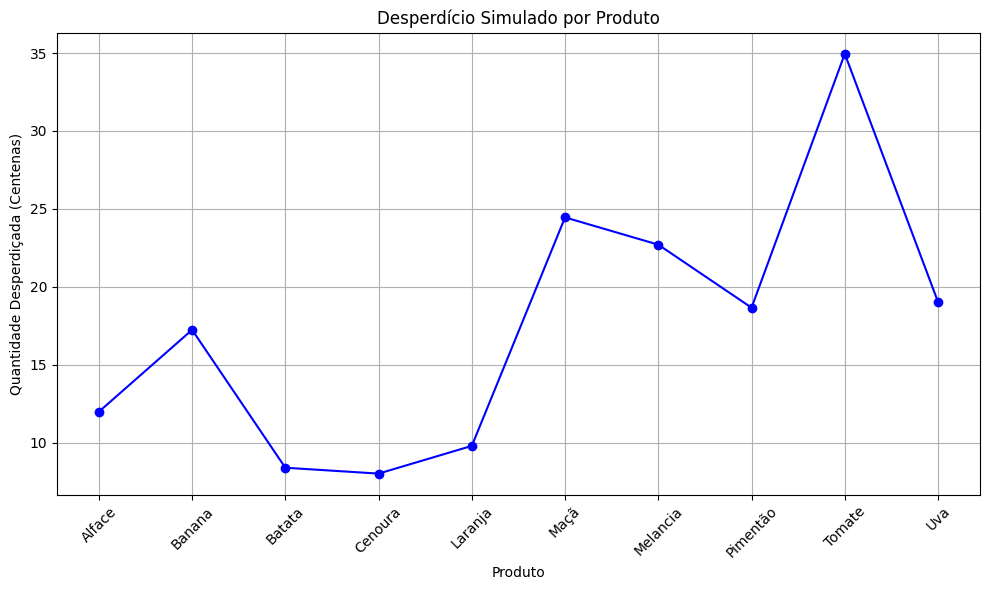

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulação de dados
data = {
    'Produto': ['Banana', 'Maçã', 'Tomate', 'Alface', 'Cenoura', 'Laranja', 'Batata', 'Pimentão', 'Uva', 'Melancia'],
    'Quantidade_Centenas': [120, 85, 150, 60, 90, 110, 130, 70, 95, 100]
}

df = pd.DataFrame(data)

# Simula taxa de desperdício entre 5% e 30%
np.random.seed(42)
df['Taxa_Desperdicio'] = np.random.uniform(5, 30, size=len(df))

# Calcula quantidade desperdiçada
df['Desperdicio'] = df['Quantidade_Centenas'] * (df['Taxa_Desperdicio'] / 100)

# Ordena por produto para manter consistência visual
df_sorted = df.sort_values('Produto')

# Gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Produto'], df_sorted['Desperdicio'], marker='o', linestyle='-', color='blue')
plt.title('Desperdício Simulado por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade Desperdiçada (Centenas)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

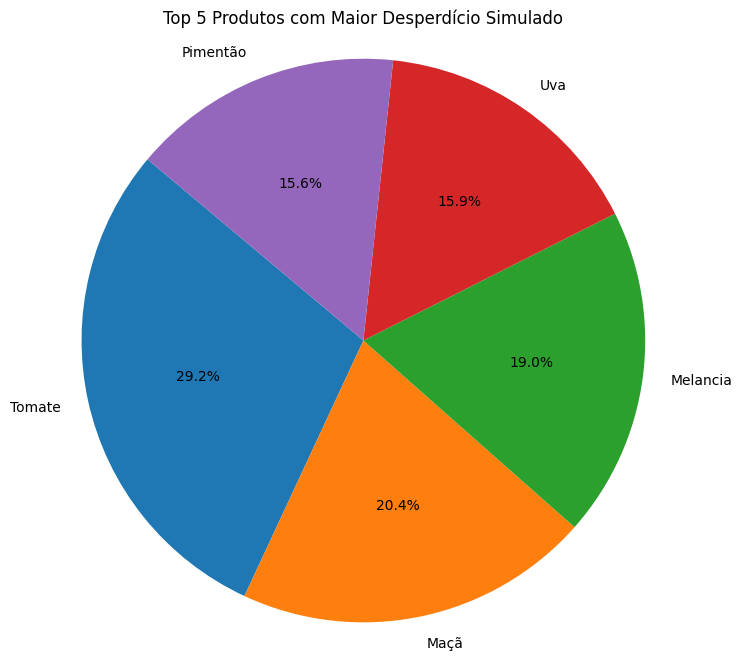

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulação de dados
data = {
    'Produto': ['Banana', 'Maçã', 'Tomate', 'Alface', 'Cenoura', 'Laranja', 'Batata', 'Pimentão', 'Uva', 'Melancia'],
    'Quantidade_Centenas': [120, 85, 150, 60, 90, 110, 130, 70, 95, 100]
}

df = pd.DataFrame(data)

# Simula taxa de desperdício entre 5% e 30%
np.random.seed(42)
df['Taxa_Desperdicio'] = np.random.uniform(5, 30, size=len(df))

# Calcula quantidade desperdiçada
df['Desperdicio'] = df['Quantidade_Centenas'] * (df['Taxa_Desperdicio'] / 100)

# Seleciona os 5 maiores desperdícios
top5 = df.nlargest(5, 'Desperdicio')

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(top5['Desperdicio'], labels=top5['Produto'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Produtos com Maior Desperdício Simulado')
plt.axis('equal')
plt.show()